In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind # t-test

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def draw_two_samples_and_do_a_ttest(src, n):
    A = src(n)
    B = src(n)
    _, pvalue = ttest_ind(A, B)
    return pvalue

def repeatedly_draw_two_samples_and_do_a_ttest(src, n, M):
    return [draw_two_samples_and_do_a_ttest(src, n) for _ in range(M)]

In [3]:
normal = lambda n: np.random.normal(size = n)
repeatedly_draw_two_samples_and_do_a_ttest(normal, 100, 5)

[0.5501947265308028,
 0.7795242355390652,
 0.8864316395156542,
 0.7111836036322641,
 0.2558613387705756]

In [4]:
repeatedly_draw_two_samples_and_do_a_ttest(np.random.standard_cauchy, 100, 5)

[0.4369619424935848,
 0.1957849457343297,
 0.17130236357448428,
 0.7130294403233219,
 0.6276252232764685]

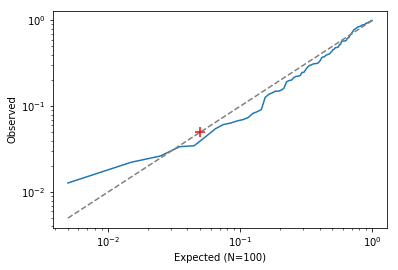

In [5]:
def qqplot(ys):
    ys = sorted([y for y in ys if not np.isnan(y)])
    N = len(ys)
    xs = (np.arange(N)+0.5) / N
    plt.loglog(xs, ys)
    plt.xlabel("Expected (N={})".format(N))
    plt.ylabel("Observed")
    plt.scatter([0.05], [0.05], color='red', marker='+', s=100)
    plt.plot([min(xs), 1], [min(xs), 1], color='grey', linestyle='dashed')
    
ps =  repeatedly_draw_two_samples_and_do_a_ttest(normal, 10, 100)
qqplot(ps)


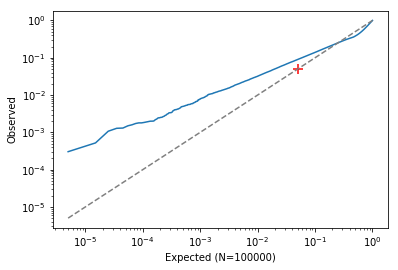

In [6]:
ps =  repeatedly_draw_two_samples_and_do_a_ttest(np.random.standard_cauchy, 10, 100000)
qqplot(ps)


In [7]:
# "Across all industries, the average CTR for a search ad is 1.91%,
# and 0.35% for a display ad.
#     https://blog.hubspot.com/agency/google-adwords-benchmark-data
click_through_rate_10 = lambda n: np.random.binomial(1, 0.10, n)
click_through_rate_0035 = lambda n: np.random.binomial(1, 0.0035, n)


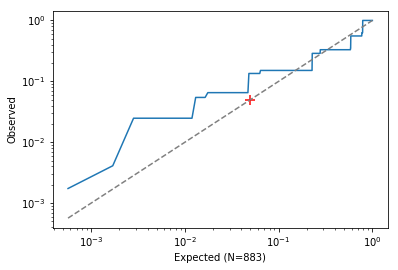

In [8]:
ps =  repeatedly_draw_two_samples_and_do_a_ttest(click_through_rate_10, 10, 1000)
qqplot(ps)

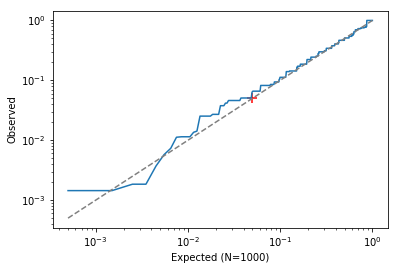

In [9]:
ps =  repeatedly_draw_two_samples_and_do_a_ttest(click_through_rate_10, 50, 1000)
qqplot(ps)

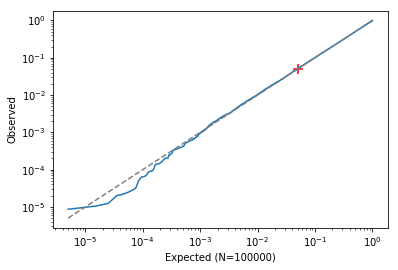

In [10]:
ps =  repeatedly_draw_two_samples_and_do_a_ttest(click_through_rate_10, 1000, 100000)
qqplot(ps)

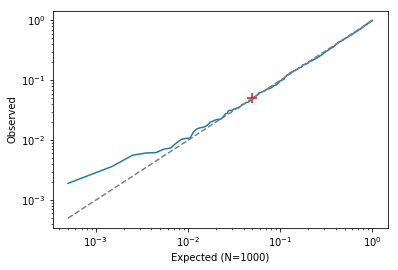

In [11]:
ps =  repeatedly_draw_two_samples_and_do_a_ttest(click_through_rate_0035, 100000, 1000)
qqplot(ps)

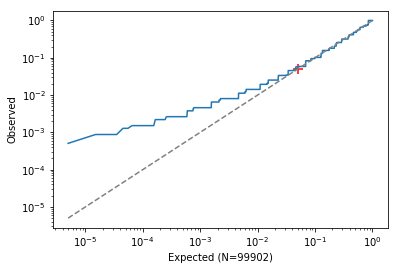

In [12]:
ps =  repeatedly_draw_two_samples_and_do_a_ttest(click_through_rate_0035, 1000, 100000)
qqplot(ps)

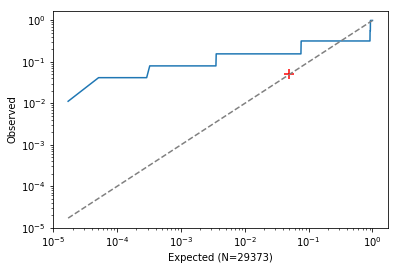

In [13]:
ps =  repeatedly_draw_two_samples_and_do_a_ttest(click_through_rate_0035, 50, 100000)
qqplot(ps)

## Outliers?


In [38]:
def draw_two_samples_and_do_a_ttest_OUTLIER(src, n, quantile_filter):
    A = src(n)
    B = src(n)
    AB = np.concatenate([A,B])
    q_low, q_high = quantile_filter/2, 1-quantile_filter/2
    thresh_low, thresh_high = np.quantile(AB, [q_low, q_high])
    A2 = [x for x in A if thresh_low <= x <= thresh_high]
    B2 = [x for x in B if thresh_low <= x <= thresh_high]
    _, pvalue = ttest_ind(A2, B2)
    return pvalue

def repeatedly_draw_two_samples_and_do_a_ttest_OUTLIER(src, n, M, quantile_filter):
    return [draw_two_samples_and_do_a_ttest_OUTLIER(src, n, quantile_filter) for _ in range(M)]

repeatedly_draw_two_samples_and_do_a_ttest_OUTLIER(np.random.standard_cauchy, 20, 5, quantile_filter=0.25)

[0.8123347621614347,
 0.19229276805577558,
 0.8528266030057903,
 0.8519002696680318,
 0.24329913796465608]

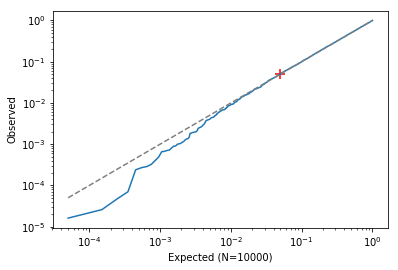

In [50]:
ps = repeatedly_draw_two_samples_and_do_a_ttest_OUTLIER(
    normal,
    #np.random.standard_cauchy,
    10, 10000, quantile_filter=0.3)
qqplot(ps)